In [7]:
import numpy as np
import tensorflow as tf
import sys
import matplotlib.pyplot as plt

def test1():
    teston = get_indices_workers_het(49000,1500)
    print("Shapes : ", len(teston))
    tot = 0
    his = []
    for i in range(len(teston)):
        a= teston[i].shape[0]
        his.append(a)
        tot += a
    print("Total = ", tot)
    plt.hist(his,bins = 10, color = 'blue',
            edgecolor = 'black')
    plt.xlabel('valeurs')
    plt.ylabel('nombres')
    plt.title('Exemple d\' histogramme simple')
    plt.show()


def get_indices_workers_het(ns, num_workers): #Generate the samples indices for each worker
    num_samples = ns
    mean1 = (num_samples / (2*0.8*num_workers)) #80% of users will hold 50% of data
    mean2 = (num_samples / (2*0.2*num_workers)) #20% of the rest will hold the 50% remaining data

    print("Mean 1 : ", mean1)
    print("Mean 2 : ", mean2)
    indices = np.arange(ns) # Indices of the samples
    np.random.shuffle(indices)

    data_remaining = num_samples # Number of samples undistributed remaining in the dataset
    num_samples_workers =  [0]
    for i in range(num_workers-1):
        if i < 0.8*num_workers + 1: # 80% users' data
            num_samples_i = np.random.poisson(mean1)
            if data_remaining - num_samples_i < 0:
                num_samples_i = data_remaining
                break
            num_samples_workers.append(num_samples_i)
            data_remaining -= num_samples_i
        else: # 20% remaining users' data
            num_samples_i = np.random.poisson(mean2)
            if data_remaining - num_samples_i < 0:
                num_samples_i = data_remaining
                break

            num_samples_workers.append(num_samples_i)
            data_remaining -= num_samples_i

    num_samples_workers.append(data_remaining)
    make_indices = np.cumsum(num_samples_workers)
    indices_workers = [indices[make_indices[i]:make_indices[i+1]] for i in range(len(make_indices)-1)] #For each worker, we have a list of the samples he possesses
    return indices_workers



Mean 1 :  20.416666666666668
Mean 2 :  81.66666666666667
Shapes :  1500
Total =  49000


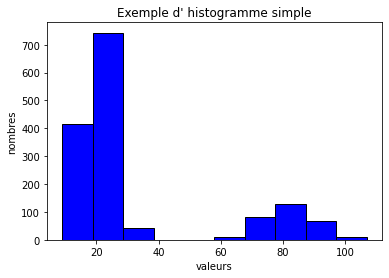

In [8]:
test1()